# Collaborative filtering 

In this notebook we will present a simple example using **Collaborative filtering** for movie **recommendation**.

Collab models uses a `DataFrame` of user, items and rating

In [1]:
from fastai import *
from fastai.collab import *

In [2]:
user, item , title = 'userId', 'movieId', 'title'

## Movie Lenser sample

In [3]:
path = untar_data(URLs.ML_SAMPLE)
path.ls()

[PosixPath('/home/anass/.fastai/data/movie_lens_sample/ratings.csv')]

In [4]:
ratings = pd.read_csv(path/'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,73,1097,4.0,1255504951
1,561,924,3.5,1172695223
2,157,260,3.5,1291598691
3,358,1210,5.0,957481884
4,130,316,2.0,1138999234


## CollabData Bunch

In [5]:
data = CollabDataBunch.from_df(ratings,seed=42)

In [6]:
y_range = [0,5.5]     #range of the rating

## Collaboration learner

In [7]:
learner = collab_learner(data, n_factors= 50, y_range=y_range)

In [8]:
learner.fit_one_cycle(3, 5e-3)

epoch,train_loss,valid_loss,time
0,1.605339,0.921189,00:00
1,0.846571,0.669703,00:00
2,0.648039,0.667053,00:00


## Movielens 100k

Let's now try with full movielens $\mathbf{100}$k datasets. The data is available from [http://files.grouplens.org/datasets/movielens/ml-100k.zip](http://files.grouplens.org/datasets/movielens/ml-100k.zip)

First we donwload the data in the default library path

```shell
cd .fastai/data
wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
unzi ml-100k.zip
```

In [9]:
path = Config.data_path()/'ml-100k'  #path for the data
path.ls()

[PosixPath('/home/anass/.fastai/data/ml-100k/allbut.pl'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u2.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u3.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/ub.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u4.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u2.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u.info'),
 PosixPath('/home/anass/.fastai/data/ml-100k/mku.sh'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u3.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u1.test'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u4.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/ub.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u5.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u.user'),
 PosixPath('/home/anass/.fastai/data/ml-100k/ua.base'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u.item'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u.genre'),
 PosixPath('/home/anass/.fastai/data/ml-100k/u1.ba

Now wil will load the `ratings` associations from each user

In [10]:
ratings = pd.read_csv(path/'u.data', delimiter='\t',header=None\
                     ,names=[user, item, 'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
print(len(ratings))

100000


Let's now load the `movies` table

In [12]:
movies = pd.read_csv(path/'u.item', delimiter='|'\
                     ,encoding ='latin-1', header=None\
                     
                    ,names = [item, 'title','date','N','url', *[f'g{i}' for i in range(19)]])

movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,...,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Now we will merge the two data dates

In [14]:
rating_movie = ratings.merge(movies[[item,title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


## Colab Data Bunch

In [16]:
data = CollabDataBunch.from_df(rating_movie,seed=42,valid_pct=0.2, item_name=title)

In [17]:
data.show_batch()

userId,title,target
885,Dead Poets Society (1989),3.0
146,Boogie Nights (1997),4.0
79,Contact (1997),5.0
299,"Unbearable Lightness of Being, The (1988)",4.0
227,Murder at 1600 (1997),3.0


## Collab Learner

In [18]:
y_range = [0,5.5]

In [19]:
learner = collab_learner(data, n_factors=40, y_range = y_range,wd  = 1e-1)

### Learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


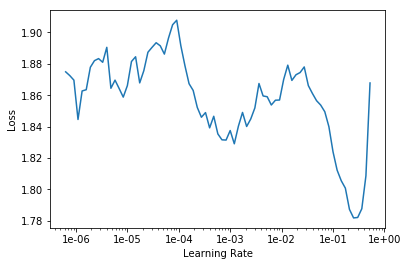

In [20]:
learner.lr_find()
learner.recorder.plot(skip_end=15)

In [21]:
learner.fit_one_cycle(5,5e-3)

epoch,train_loss,valid_loss,time
0,0.984641,0.974740,00:04
1,0.910897,0.895439,00:04
2,0.795509,0.851270,00:04
3,0.671110,0.831514,00:04
4,0.537560,0.830678,00:04


Here is a link to [some benchmarks](https://www.librec.net/release/v1.3/example.html) which shows the best results on this dataset.  The best results acheive a **RMSE** of 0.91 which correspond to **MSE = 0.83**

In [22]:
learner.save('dotprod')

## Interpretation

Let's investigate the entries of the leanrer and try to extract some informations about the weights 

In [23]:
learner.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1639, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1639, 1)
)

Let get the most rated movies

In [52]:
g = rating_movie.groupby(title)['rating'].count()
#sort the series by count, take the most cited 1000 movies
top_movies = g.sort_values(ascending=False).index.values[:1000]
top_movies[:10]

array(['Star Wars (1977)', 'Contact (1997)', 'Fargo (1996)', 'Return of the Jedi (1983)', 'Liar Liar (1997)',
       'English Patient, The (1996)', 'Scream (1996)', 'Toy Story (1995)', 'Air Force One (1997)',
       'Independence Day (ID4) (1996)'], dtype=object)

## Movie Bias

In [53]:
movie_bias = learner.bias(top_movies,is_item=True)
movie_bias.shape

torch.Size([1000])

In [54]:
mean_ratings = rating_movie.groupby(title)['rating'].mean()
movie_rating = [(b,i, mean_ratings.loc[i]) for i,b in zip(top_movies, movie_bias)]

This is a 100 bias for each item. Let's view the movies by the most bias 

In [55]:
item0 = lambda x: x[0]   #we will sort by the first item

In [57]:
least_bias =    sorted(movie_rating, key=item0)
least_bias[:15]

[(tensor(-0.3686),
  'Children of the Corn: The Gathering (1996)',
  1.3157894736842106),
 (tensor(-0.2787),
  'Lawnmower Man 2: Beyond Cyberspace (1996)',
  1.7142857142857142),
 (tensor(-0.2605), 'Cable Guy, The (1996)', 2.339622641509434),
 (tensor(-0.2590), 'Mortal Kombat: Annihilation (1997)', 1.9534883720930232),
 (tensor(-0.2474), 'Ready to Wear (Pret-A-Porter) (1994)', 1.8333333333333333),
 (tensor(-0.2467), 'Beverly Hills Ninja (1997)', 2.3125),
 (tensor(-0.2333), 'Crow: City of Angels, The (1996)', 1.9487179487179487),
 (tensor(-0.2288), 'Thinner (1996)', 2.4489795918367347),
 (tensor(-0.2228), 'Striptease (1996)', 2.2388059701492535),
 (tensor(-0.2008), 'Free Willy 3: The Rescue (1997)', 1.7407407407407407),
 (tensor(-0.1987), 'Super Mario Bros. (1993)', 2.076923076923077),
 (tensor(-0.1980), 'Anaconda (1997)', 2.289473684210526),
 (tensor(-0.1972), 'Island of Dr. Moreau, The (1996)', 2.1578947368421053),
 (tensor(-0.1960), 'Showgirls (1995)', 1.9565217391304348),
 (tensor(-

In [60]:
most_rated = sorted(movie_rating, key= item0, reverse=True)
most_rated[:10]

[(tensor(0.6092), "Schindler's List (1993)", 4.466442953020135),
 (tensor(0.5686), 'Shawshank Redemption, The (1994)', 4.445229681978798),
 (tensor(0.5669), 'Rear Window (1954)', 4.3875598086124405),
 (tensor(0.5542), 'Titanic (1997)', 4.2457142857142856),
 (tensor(0.5470), 'Silence of the Lambs, The (1991)', 4.28974358974359),
 (tensor(0.5401), 'Casablanca (1942)', 4.45679012345679),
 (tensor(0.5224), 'Star Wars (1977)', 4.3584905660377355),
 (tensor(0.5128), 'L.A. Confidential (1997)', 4.161616161616162),
 (tensor(0.4965), 'Good Will Hunting (1997)', 4.262626262626263),
 (tensor(0.4543), 'Boot, Das (1981)', 4.203980099502488)]

No surprive their, some movies are really **awesome**

## Movie Weights

In [61]:
movie_w = learner.weight(top_movies, is_item=True)
movie_w.shape

torch.Size([1000, 40])

fastai add a `pca` method to tensor parameter.

In [62]:
movie_pca = movie_w.pca(3)
movie_pca.shape

torch.Size([1000, 3])

In [65]:
fac0, fac1, fac2 = movie_pca.t()
movie_comp = [(f,i) for f,i in zip(fac0,top_movies)]

In [66]:
sorted(movie_comp, key=item0, reverse=True)[:10]

[(tensor(1.1283), 'Wrong Trousers, The (1993)'),
 (tensor(1.0681), 'When We Were Kings (1996)'),
 (tensor(1.0656), 'Lawrence of Arabia (1962)'),
 (tensor(1.0487), 'Close Shave, A (1995)'),
 (tensor(1.0352), 'Some Folks Call It a Sling Blade (1993)'),
 (tensor(1.0224), 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (tensor(1.0040), 'Casablanca (1942)'),
 (tensor(1.0011), 'Chinatown (1974)'),
 (tensor(0.9729), 'Godfather, The (1972)'),
 (tensor(0.9688), 'North by Northwest (1959)')]

According to the first component of the weights `fac0` those are the movies with strongest coefficients.

Finally let's try to draw those movies according the first two components $(fac_0, fac_1)$

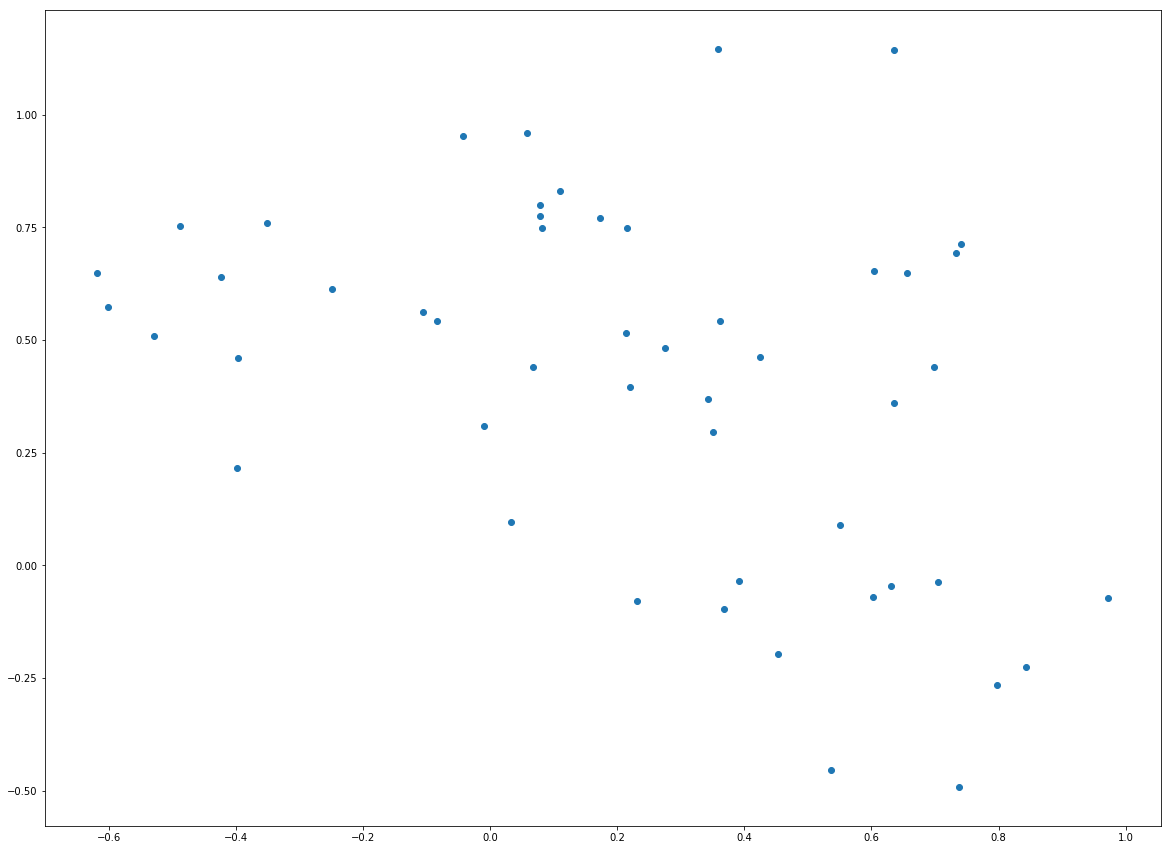

In [69]:
# First 50 movies
idxs = list(range(50))

X = fac0[idxs]
Y = fac1[idxs]

plt.figure(figsize=(20,15))

#repsenting the points
plt.scatter(X,Y)

#adding text

for i, x, y in zip(top_movies[idx], X, Y):
    plt.txt(x,y,i, color=np.random.rand(3)*0.7,fontsize=11)